Automatically created module for IPython interactive environment
[[-1.5        -1.43877551 -1.37755102 ...  1.37755102  1.43877551
   1.5       ]
 [-1.5        -1.43877551 -1.37755102 ...  1.37755102  1.43877551
   1.5       ]
 [-1.5        -1.43877551 -1.37755102 ...  1.37755102  1.43877551
   1.5       ]
 ...
 [-1.5        -1.43877551 -1.37755102 ...  1.37755102  1.43877551
   1.5       ]
 [-1.5        -1.43877551 -1.37755102 ...  1.37755102  1.43877551
   1.5       ]
 [-1.5        -1.43877551 -1.37755102 ...  1.37755102  1.43877551
   1.5       ]]
(2500, 289)
(50, 50)


C:\Users\choug\AppData\Local\Temp\ipykernel_39476\88946127.py:46: UserWarning: linewidths is ignored by contourf
  plt.contourf(X1, X2, Z_grid, cmap='jet', linewidths=1, origin='lower')


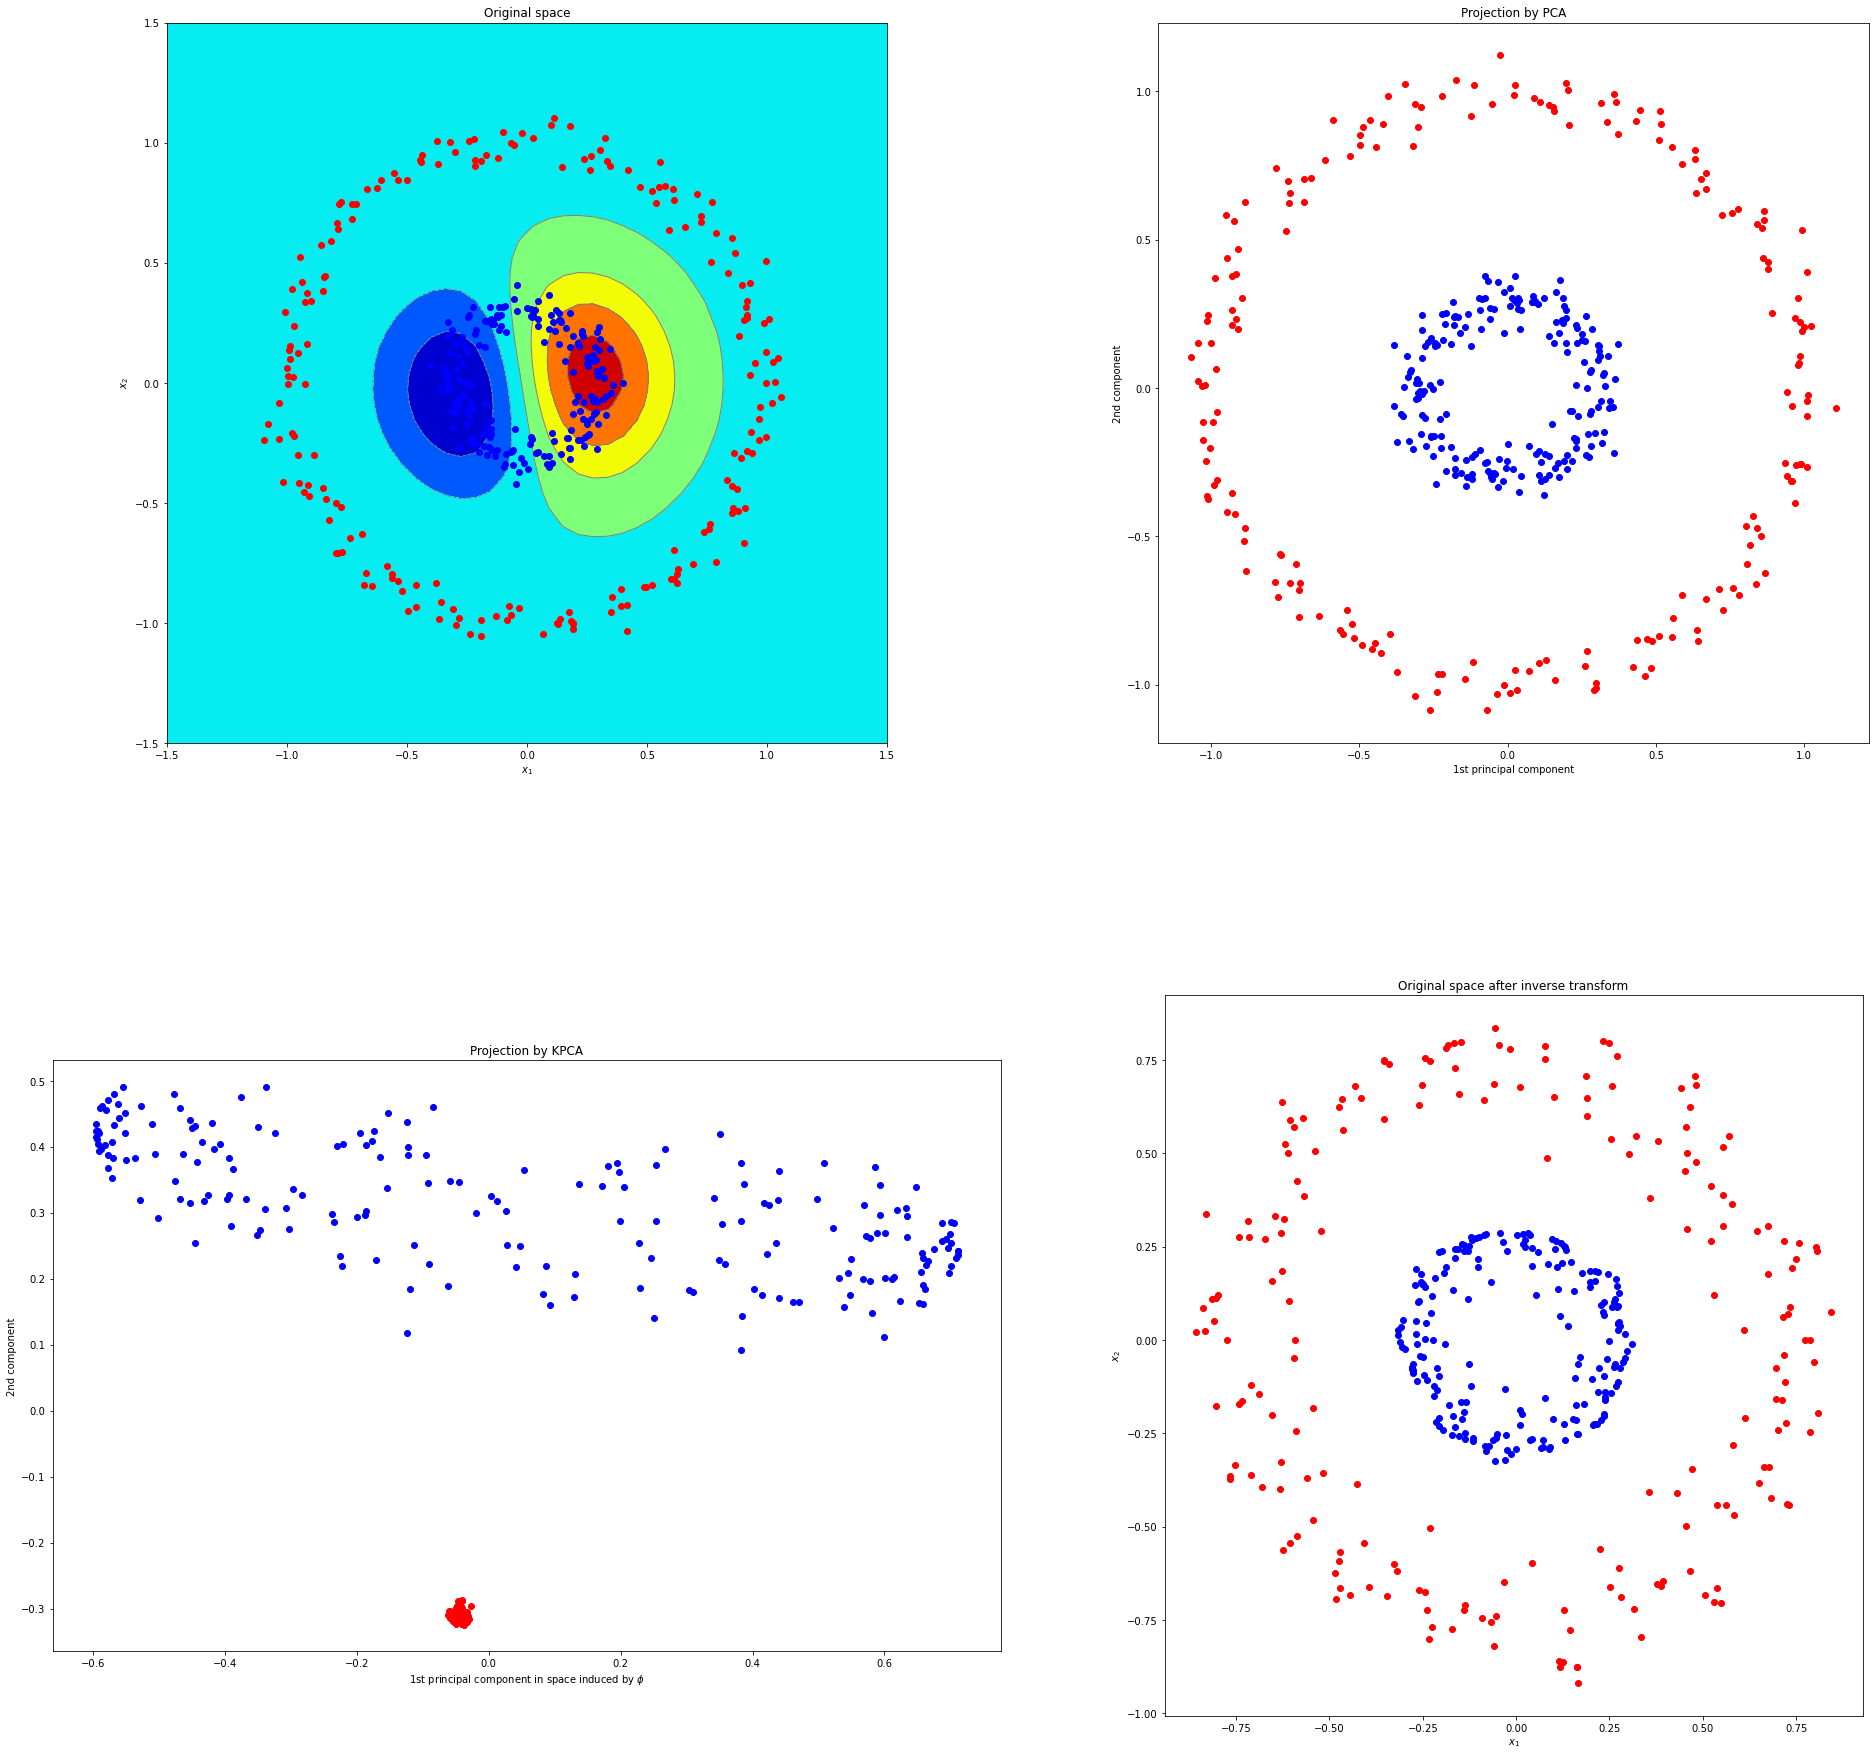

In [11]:
print(__doc__)

# Authors: Mathieu Blondel
#          Andreas Mueller
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure(figsize=(28, 28))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
print(X1)
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
test = kpca.transform(X_grid)
print(test.shape)

Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
print(Z_grid.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')
plt.contourf(X1, X2, Z_grid, cmap='jet', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "ro")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.plot(X_back[reds, 0], X_back[reds, 1], "ro")
plt.plot(X_back[blues, 0], X_back[blues, 1], "bo")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()